# Project Aim
Artificial Intelligence is no longer a buzz-word. The world today is integratinng itself with AI tools and technologies. The primary search engines that we had been using over decades have also started to integrate AI. The project aims to identify the implications of Machine Learning and AI for optimizing the performances of these search engines. 
* Dataset used for this purpose is google/serp/seo-data which is based on San-Francisco and NYC searches.
* The dataset contains nearly 500+ keywords.
* Original search queries, top ads, product listing ads, merchandise domains etc are some features available.
* The aim of this project is to identify this key features and how to build a better search engines for performance optimization.

In [1]:
# importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from dataclasses import dataclass

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from openTSNE import TSNEEmbedding
from openTSNE import initialization
from openTSNE import affinity
from numpy.linalg import norm

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score

In [2]:
# data reading
df = pd.read_csv(r"D:\SearchEngine\\artifacts\\train.csv",na_values = "#")
df.head()

,scandate,keywordid,keywordname,url,domain,page,panel,position,title,ispicture,type,subgroup_position,is_ad,city,browser
0,2022-04-21 00:09:21,1068,gmc sierra for sale,https://www.sellersbuickgmc.com/VehicleSearchR...,sellersbuickgmc,1,MAIN,10.0,New GMC Sierra 1500 Vehicles for Sale with Tra...,NaN,organic,10,0,San Francisco,PC
1,2022-04-21 00:09:21,234,office desk,https://www.wayfair.co.uk/Brayden-Studio--Gree...,wayfair,1,MAIN,1.0,"Greenview Desk Brayden Studio Size: 29.02"" H x...",1.0,pla,17,1,New York,PC
2,2022-04-21 00:09:21,127,office chair,NaN,modernobjects&designinc,1,MAIN,5.0,Modern Objects & Design Inc,NaN,map,3,0,New York,PC
3,2022-04-21 00:09:21,1614,boyfriend jeans,https://www.nyandcompany.com/womens-jeans/boyf...,nyandcom,1,MAIN,20.0,Boyfriend Jeans & Mom Jeans for Women | NY&C -...,NaN,organic,16,0,New York,PC
4,2022-04-21 00:09:21,1869,haider ackermann,https://purple.fr/magazine/purple-25yrs-anniv-...,purple,1,MAIN,22.0,Haider Ackermann - purple MAGAZINE,NaN,organic,19,0,San Francisco,PC


# Data Pre-Processing

In [3]:
print("No of features in dataset are",df.shape[1])
print("No of samples in dataset are",df.shape[0])

No of features in dataset are 15
No of samples in dataset are 111287


In [4]:
# data types
df.dtypes

scandate              object
keywordid              int64
keywordname           object
url                   object
domain                object
page                   int64
panel                 object
position             float64
title                 object
ispicture            float64
type                  object
subgroup_position      int64
is_ad                  int64
city                  object
browser               object
dtype: object

In [5]:
print(len(df.keywordname.unique()))

1978


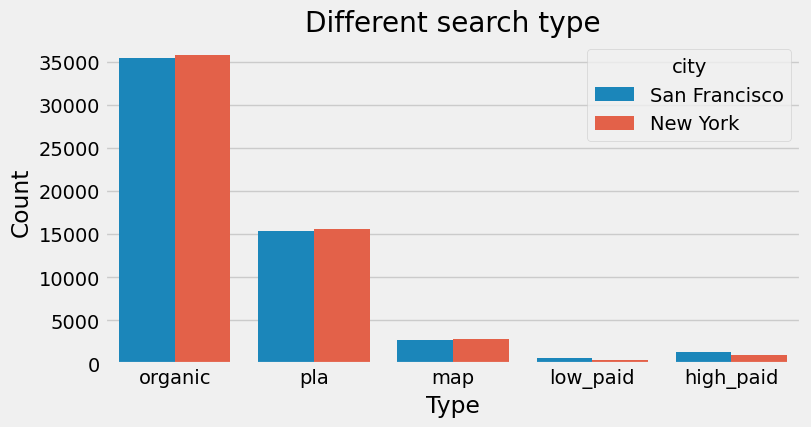

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,4))
sb.countplot(x= df['type'],hue = df['city'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.get_cmap('magma')
plt.title('Different search type')
plt.show()

In [7]:
# checking for the valid url.
import re
def valid_url(url):
    try:
        regex = r"^((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w-]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)$"
        if re.match(regex,url):
            return url
        else:
            return 'Invalid_url'
    except Exception as e:
        print(f"Error occured:{e}")
        return 'Invalid_url'
    

df['url'] = df['url'].map(lambda x : valid_url(x))

Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-l

Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-like object, got 'float'
Error occured:expected string or bytes-l

In [8]:
df['url']

0         https://www.sellersbuickgmc.com/VehicleSearchR...
1         https://www.wayfair.co.uk/Brayden-Studio--Gree...
2                                               Invalid_url
3         https://www.nyandcompany.com/womens-jeans/boyf...
4         https://purple.fr/magazine/purple-25yrs-anniv-...
                                ...                        
111282    https://www.prettylittlething.us/shop-by/gradu...
111283    https://www.instagram.com/suicoke_official/?hl=en
111284    http://www.us.allsaints.com/women/skirts-and-s...
111285    https://topspeedauto.com/infiniti-g37-coupe-08...
111286      https://www.chatham.com/collections/alexandrite
Name: url, Length: 111287, dtype: object

In [9]:
print('Samples before dropping invalid url',df.shape[0])
df.drop(df.index[df['url'] == 'Invalid_url'],inplace = True)
print('====================================')
print('Samples after dropping invalid url',df.shape[0])

Samples before dropping invalid url 111287
Samples after dropping invalid url 103780


In [10]:
df.isna().sum()

scandate                 0
keywordid                0
keywordname              0
url                      0
domain                   0
page                     0
panel                    0
position              2567
title                    0
ispicture            70571
type                     0
subgroup_position        0
is_ad                    0
city                     0
browser                  0
dtype: int64

In [11]:
df.drop('ispicture',axis = 1, inplace = True)

In [12]:
df.dropna(axis =0,inplace=True)

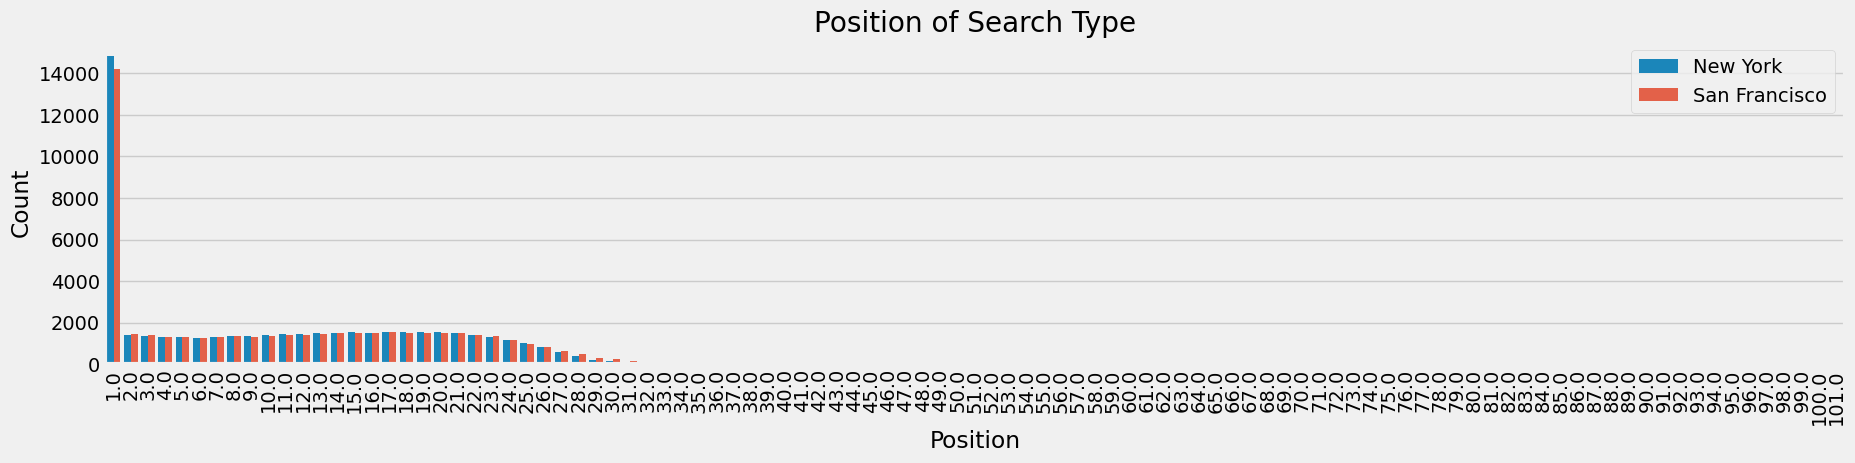

In [13]:
plt.figure(figsize=(20,4))
sb.countplot(x = df['position'],hue = df['city'])
plt.xlabel('Position')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.legend()
plt.title('Position of Search Type')
plt.show()

In [14]:
# Encoding domain and keyword values with frequency encoding.

domain_freq = df.domain.value_counts(normalize=True)
keyword_freq = df.keywordname.value_counts(normalize=True)

df['keywordname'] = df['keywordname'].map(keyword_freq)
df['domain'] = df['domain'].map(domain_freq)

## Clustering the object datatypes.
* We can see that features like domain,keywordname and title are object data types.
* We will try to preprocess the data such that these objects are clustered together with words have similar or meaning close to each other.

In [14]:
df['categorical_data'] = df['keywordname'] + df['title'] + df['domain']
df['categorical_data']

0         gmc sierra for saleNew GMC Sierra 1500 Vehicle...
1         office deskGreenview Desk Brayden Studio Size:...
3         boyfriend jeansBoyfriend Jeans & Mom Jeans for...
4         haider ackermannHaider Ackermann - purple MAGA...
5                         plant potsPlanters - Targettarget
                                ...                        
111282    white graduation dressGraduation Dresses 2022 ...
111283    suicokeSUICOKE (@suicoke_official) \u2022 Inst...
111284    tulle skirtAllSaints Women's Veena Tulle Pleat...
111285    g37 coupeInfiniti G37 Coupe Top Speed Pro1 Axl...
111286    alexandrite ringAlexandrite Collection - Chath...
Name: categorical_data, Length: 101213, dtype: object

In [15]:
@dataclass
class Preprocess:
    """Takes raw text as input, removes punctuation,stopwords and keeps the unique word in the data."""
    text : str

    def punctuations(self):
        sent = self.text

        sent1 = word_tokenize(sent)
        sample_lst = list()
        for word in sent1:
            # Replace 'digits' string with an empty string using regex
            sent2 = re.sub(r'\d+', "", word)
            # Remove other punctuation marks
            sent3 = re.sub(r'[^\w\s]',"",sent2)
            sample_lst.append(sent3)
        return sample_lst    
    
    def splitting_lower(self):
        sent1 = self.punctuations()
        lower_word = [word.lower() for word in sent1]
        return lower_word
    
    def remove_stopwords(self):
        lower_word = self.splitting_lower()
        stop = stopwords.words('english')
        new_word = [word for word in lower_word if word not in stop]
        return new_word
    
    
    


In [16]:
# Function to call preprocess class.
def preprocess(text):
    preprocessor = Preprocess(text)
    return preprocessor.remove_stopwords()

In [17]:
# preprocessing categorical data
df['preprocessed_data'] = df['categorical_data'].map(lambda x : preprocess(x))
df['preprocessed_data']

0         [gmc, sierra, salenew, gmc, sierra, , vehicles...
1         [office, deskgreenview, desk, brayden, studio,...
3         [boyfriend, jeansboyfriend, jeans, , mom, jean...
4         [haider, ackermannhaider, ackermann, , purple,...
5                     [plant, potsplanters, , targettarget]
                                ...                        
111282    [white, graduation, dressgraduation, dresses, ...
111283    [suicokesuicoke, , , suicoke_official, , u, in...
111284    [tulle, skirtallsaints, women, veena, tulle, p...
111285    [g, coupeinfiniti, g, coupe, top, speed, pro, ...
111286    [alexandrite, ringalexandrite, collection, , c...
Name: preprocessed_data, Length: 101213, dtype: object

In [18]:
def remove_unwanted(text):
    word_set = set(['f','x','t','y','s','c','u','h','.','o','w','D','u2022','g37','gmc','','g'])
    new_text = [word for word in text if word not in word_set]
    new_text = list(set(new_text))
    return new_text

df['preprocessed_data'] = df['preprocessed_data'].map(lambda x : remove_unwanted(x))
df['preprocessed_data']

0         [sale, salenew, sellersbuickgmc, sierra, vehic...
1         [desk, dwayfair, brayden, size, office, studio...
3         [new, boyfriend, nyandcom, women, ny, jeansboy...
4         [ackermannhaider, purple, ackermann, magazinep...
5                       [plant, targettarget, potsplanters]
                                ...                        
111282    [grad, prettylittlething, white, dresses, dres...
111283    [suicokesuicoke, instagram, videosinstagram, p...
111284    [skirt, allsaints, pleated, us, size, women, u...
111285    [coupeinfiniti, systemtopspeedauto, axleback, ...
111286    [ringalexandrite, collection, alexandrite, inc...
Name: preprocessed_data, Length: 101213, dtype: object

In [19]:
# clustering the words.
from gensim.models import word2vec

def word_embeddings(text_list) -> list:
    """Takes the preprocessed data as input and returns word embeddings."""
    embeddings_lst = []
    if not text_list:
        print("Error the input is not text.")
        return 

    
    #Initiate word2vec model
    model = word2vec.Word2Vec(text_list,vector_size = 2,min_count=5)
    model.train(text_list, total_examples = len(text_list),epochs = 5)

    
    for preprocessed_data in text_list:
        similar_embedding = []
        try:
            for word in preprocessed_data:
                if word in model.wv.key_to_index:
                    similar_embedding.append(model.wv[word])
        except KeyError as e:
            print(f"Warning: Word is {word} not present in vocabulary")   
            continue

        #word_lst.append(similar_words)
        embeddings_lst.append(similar_embedding)

    return embeddings_lst

In [190]:
embeddings = word_embeddings(df['preprocessed_data'].tolist())
embeddings

[['transparent', 'sale', 'vehicles', 'salenew', 'sierra'],
 ['dwayfair', 'studio', 'office', 'size', 'desk', 'brayden'],
 ['boyfriend',
  'jeansboyfriend',
  'mom',
  'nyandcom',
  'women',
  'ny',
  'new',
  'jeans'],
 ['ackermann', 'haider', 'ackermannhaider', 'purple'],
 ['potsplanters', 'plant', 'targettarget'],
 ['lawn', 'used', 'mower', 'sale', 'offerupofferup', 'riding'],
 ['floating', 'wall', 'logan', 'size', 'dwayfair', 'shelf', 'wade'],
 ['parts', 'llc', 'walmartwalmart', 'geek'],
 ['tshirt', 'vistaprintvistaprint', 'tshirts', 'design', 'printing'],
 ['george',
  'small',
  'square',
  'loveseat',
  'oliver',
  'arm',
  'rosewayfair',
  'velvet',
  'upholstery',
  'color'],
 ['trees', 'made', 'usa', 'furniture', 'condos', 'cat'],
 ['activities', 'fl', 'things', 'miami'],
 ['find', 'used', 'secondhand', 'furniturewhere', 'furniture'],
 ['harry',
  'sling',
  'backpack',
  'bradley',
  'potter',
  'vera',
  'women',
  'backpackvera',
  'forest'],
 ['arigatoaxel',
  'sneakerssse

In [218]:
def word_clusters(text_list) -> list:
    """Calculates the word similarities using word2vec model"""
    words_lst = []
    if not text_list:
        print("Error the input is not valid")
    
    # Initiate the word2vec model
    model = word2vec.Word2Vec(text_list,vector_size=2,min_count=7)
    model.train(text_list, total_examples=len(text_list), epochs = 5)
    keys = ['youtube','vehicle','sales','amazon','food','facebook','resorts','yahoo','walmart','weather','gmail','google','ebay','instagram']

    for word in keys:   
        similar_word = []
        try:
            for same_word in model.wv.most_similar(word,topn=50):
                similar_word.append((same_word,word))

        except KeyError as e:
            print(f"Warning {word} is not in the vocabulary")
            continue

        words_lst.append(similar_word) 

    return words_lst               


In [219]:
words = word_clusters(df['preprocessed_data'].tolist())

Warning youtube is not in the vocabulary
Warning gmail is not in the vocabulary


In [220]:
words[7]

[(('setspatio', 1.0), 'walmart'),
 (('panels', 1.0), 'walmart'),
 (('rvh', 0.9999999403953552), 'walmart'),
 (('handymanfamilyhandyman', 0.9999998807907104), 'walmart'),
 (('thick', 0.9999998807907104), 'walmart'),
 (('monitors', 0.9999997615814209), 'walmart'),
 (('awnings', 0.9999997615814209), 'walmart'),
 (('fencing', 0.9999995827674866), 'walmart'),
 (('fab', 0.9999994039535522), 'walmart'),
 (('units', 0.9999993443489075), 'walmart'),
 (('passage', 0.9999991059303284), 'walmart'),
 (('benchshoe', 0.9999982118606567), 'walmart'),
 (('xxsmall', 0.9999979734420776), 'walmart'),
 (('westindustrywest', 0.9999978542327881), 'walmart'),
 (('zapposzappos', 0.9999977946281433), 'walmart'),
 (('sheetsbed', 0.999997615814209), 'walmart'),
 (('dean', 0.9999974370002747), 'walmart'),
 (('baxton', 0.9999973177909851), 'walmart'),
 (('arch', 0.9999969601631165), 'walmart'),
 (('formal', 0.9999961853027344), 'walmart'),
 (('blackallmodern', 0.9999961256980896), 'walmart'),
 (('tablewhite', 0.999

* Embeddings generated is the list with total length of 101213 which has inner list of length of tokens and consist of arrays of embeddings for each word.
* For further analysis we will use T-SNE embeddings. T-SNE methods takes array of shape (number_of_samples,number_of_features).
* Since the embeddings generated consists of inhomogenous shape, in order to make the embeddings array in the form of (no_of_samples,no_of_features). We will reshape the data.

In [137]:
#filtering non empty embeddings.
non_empty_index = [index for index,embedding in enumerate(embeddings) if embedding]
print(len(non_empty_index))
non_empty_embeddings = [embedding for embedding in embeddings if embedding]
print(len(non_empty_embeddings))
max_length = max(len(embedding) for embedding in non_empty_embeddings)

#Pad the shorter embeddings with zeroes.
padded_embeddings = [np.concatenate((embedding,np.zeros((max_length - len(embedding),len(embedding[0]))))) for embedding in non_empty_embeddings]
len(padded_embeddings[0])

100866
100866


23

In [133]:
flattened_array = np.array(padded_embeddings)
print(flattened_array.shape)
array_2d = flattened_array.reshape(100866,46)
print(array_2d.shape)

(100866, 23, 2)
(100866, 46)


In [140]:
df.reset_index(drop=True,inplace=True)

In [143]:
df_final = df[df.index.isin(non_empty_index)]
df_final['position'].shape

(100866,)

# Feature selection 
* We will implement TSNE and PCA on search queries in the samples. 
* The sentences are already created into tokens , will be used to compute embeddings and similarity. 

In [83]:
from openTSNE import TSNEEmbedding
from openTSNE import initialization
from openTSNE import affinity


def TSNE_embeddings(embeddings,vector_size,batch_size = 1000):
    """Takes embeddings as input and returns tsne cluster embeddings."""
    
    # Embeddings reshape.
    #no_samples,no_embeddings,no_features = embeddings.shape
    #flattened_2d_array = embeddings.reshape(no_samples*no_embeddings,no_features)

    # Initiate a empty array.
    all_embeddings = np.zeros((len(embeddings),vector_size))

    # No of batches based on the batch size.
    num_batches = (len(embeddings) + batch_size - 1) // batch_size

    # Iterate through each path.
    for i in range(num_batches):
        # Extract current batch embeddings.
        start_idx = i*batch_size
        end_idx = min((i+1)*batch_size,len(embeddings))
        batch_embeddings = embeddings[start_idx:end_idx]

        # Algorithm initialization using perplexity basedNN
        %time
        affinities_train = affinity.PerplexityBasedNN(
            batch_embeddings,perplexity = 30,metric = 'cosine',n_jobs = 8, verbose = True,random_state = 42)
    
        # Generating initial co-ordinates.
        %time 
        init_train = initialization.pca(batch_embeddings, random_state=42)

        # Embedding training.
        %time 
        embedding_train = TSNEEmbedding(
        init_train,affinities_train, negative_gradient_method = 'fft',random_state = 42)   

        # Store all the embeddings.
        all_embeddings[start_idx:end_idx] = batch_embeddings 

    return all_embeddings
    
    

In [108]:
trained_embedding = TSNE_embeddings(array_2d,vector_size=46)

CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 90 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 0.16 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 90 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 0.22 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 90 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 0.16 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 90 nearest neig

In [109]:
trained_embedding[0]

array([ 0.32519695, -0.15165834,  2.20984101, -3.00103068,  3.04373479,
       -4.07857513,  5.24572229, -7.05383635,  1.89172065, -2.25035954,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [27]:

type(trained_embedding)
np.save('train_vector_embeddings(1).npy',trained_embedding)

In [3]:
embed_train = np.load(r'D:\SearchEngine\\notebook\\train_vector_embeddings.npy')

In [32]:
print(flattened_array[:,0].shape)
print(flattened_array[:,1].shape)
print(flattened_array[:,2].shape)
print(flattened_array[:,3].shape)

(34682, 50)
(34682, 50)
(34682, 50)
(34682, 50)


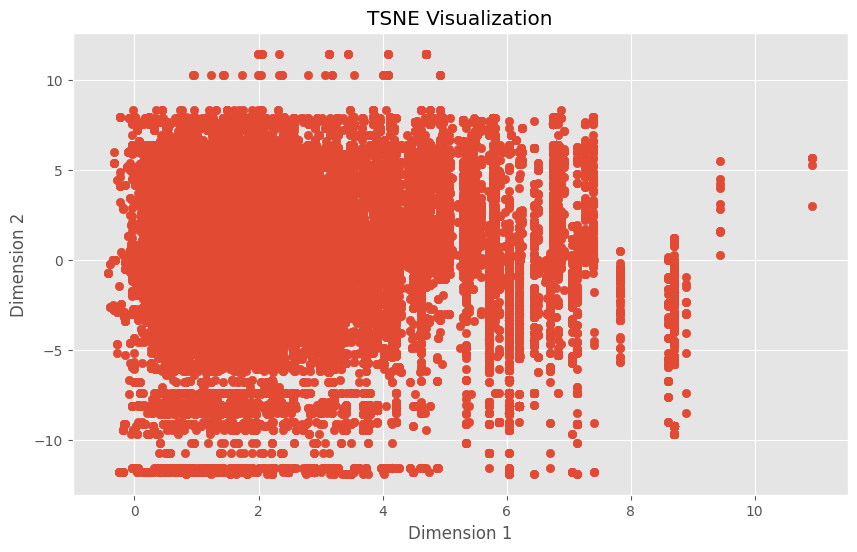

In [111]:
plt.figure(figsize = (10,6))
plt.scatter(trained_embedding[:,0],trained_embedding[:,3])
plt.title('TSNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

* After T-SNE visualization we can clearly see that using clustering algorithms will not be ideal process. There are no clear cut patterns in the data to combine the embeddings as clusters.
* To improve our analysis we will further use tf-idf vectorizer appraoach along with LDA.

In [21]:
# creating cluster of words.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def tf_idf(embeddings,max_features) -> list:
    vectorizer = TfidfVectorizer(max_features = max_features,max_df = 0.95)
    X = vectorizer.fit_transform(embeddings)
    return X


In [22]:
total_embedding = []
for embedding in df['preprocessed_data']:
    total_embedding.append(' '.join(embedding))

total_embedding    

['transparent vehicles sellersbuickgmc sale salenew sierra',
 'desk studio dwayfair size deskgreenview office brayden',
 'boyfriend new mom nyandcom jeans ny jeansboyfriend women',
 'magazinepurple ackermannhaider haider ackermann purple',
 'targettarget plant potsplanters',
 'riding mowersnew used offerupofferup mower sale lawn',
 'dwayfair shelfhissop shelf size logan floating wade wall',
 'walmartwalmart geek geekseller llc parts',
 'design tshirt vistaprintvistaprint shirtcustom printing tshirts',
 'george small square upholstery loveseat color arm oliver rosewayfair couchchristner velvet',
 'usa cat made newcatcondos condonew condos trees furniture',
 'activities miamithings attractionstravelocity miami things fl',
 'used secondhand find platinumpropertiesnyc furniturewhere furniture',
 'vera bradley potter harry sling forest backpackvera purpleverabradley backpack forbidden women',
 'easy adjustable kit gcbbqguys grill cabinet cement kitchen board frame outdoor cabinetsgrillnetic

In [30]:
len(total_embedding)

103780

In [23]:
tfidf_matrix = tf_idf(total_embedding,max_features = 10)

In [44]:
tfidf_matrix.shape

(103780, 10)

In [24]:
def LDA_training(data) -> list:
    """Take tfidf vectors generated as input and returns latent"""
    scores = []
    lda = LatentDirichletAllocation(n_components=5,random_state=10)
    fitted = lda.fit(data)
    scores.append(lda.score(data))
    return scores

In [25]:
Lda_tfidf_matrix = LDA_training(tfidf_matrix)
Lda_tfidf_matrix

[-92176.71405012305]

# Sentence-Transformers
* We have used LDA and T-SNE to analyze the embeddings, however we the semantic meaning lacks the context of the search.
* In order to overcome this problems we use sentence transformers from hugging face to embed the search query.
* After obtaining the embeddings will be calculate the similarity of the queries and embedding which can be used for training.

In [24]:
from sentence_transformers import SentenceTransformer

def sentence_embedding(text_list,batch_size) -> list:
    """Take the query provided by the user as input and provides embeddings as output for these queries."""

    # checking for correct input:
    if not text_list:
        print("Error the input is not valid")

    # Initiate SentenceTransformer.
    embeddings = []
    num_batches = (len(text_list)+ batch_size -1) // batch_size
    for i in range(num_batches):
        start_idx = i*num_batches
        end_idx = min((i+1)*num_batches,len(text_list))
        model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')  

        # storing the embeddings
        embeddings.append(model.encode(text_list[start_idx : end_idx]))
        print(f"The batch {i} is encoded out {len(num_batches)} batches .")

    return embeddings


sent_embeddings = sentence_embedding(df['title'].tolist(),batch_size=10000)
           

d:\SearchEngine\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: sentence_embedding() missing 1 required positional argument: 'batch_size'

In [15]:
embeddings_sent = np.load(r'D:\\SearchEngine\\notebook\\final_sent_embeddings.npy')

In [16]:
# After creating the sentence embeddings, we will implement the T-SNE model for lowering the embedding dimensions.
# This will help in representing the vector embeddings in lower dimensions and help us understand the embeddings which are close to each other.

def tsne(embeddings,batch_size) -> list:
    """Returns the list of low-dimensional embeddings."""

    # Initiate a empty array.
    all_embeddings = np.zeros((embeddings.shape[0],2))
    # Generating batch number.
    num_batches = (len(embeddings) + batch_size - 1) // batch_size

    # Initiate the training of tsne.
    for i in range(num_batches):
        start_idx = i*num_batches
        end_idx = min((i+1)*batch_size,len(embeddings))
        batch_train = embeddings[start_idx : end_idx]

        # fitting tsne
        %time
        affinity_train = affinity.PerplexityBasedNN(
            batch_train, perplexity=20, metric = 'euclidean', n_jobs = 8, verbose = True, random_state =12
        )

        %time
        init_train = initialization.pca(
            batch_train,random_state = 12
        )
        model_tsne = TSNEEmbedding(
            init_train, affinity_train, negative_gradient_method = 'fft',random_state = 12
        )

        all_embeddings[start_idx : end_idx] = model_tsne
        
    return all_embeddings
        

In [17]:
tsne_train_embed = tsne(embeddings_sent,10000)

CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 60 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 4.30 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.66 seconds
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 60 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 12.33 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.27 seconds
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 60 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 20.45 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.51 seconds
CPU times: total: 0 ns
Wall time: 0 ns
CPU times: total: 0 ns
Wall time: 0 ns
===> Finding 60 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 26.06 seconds
===> C

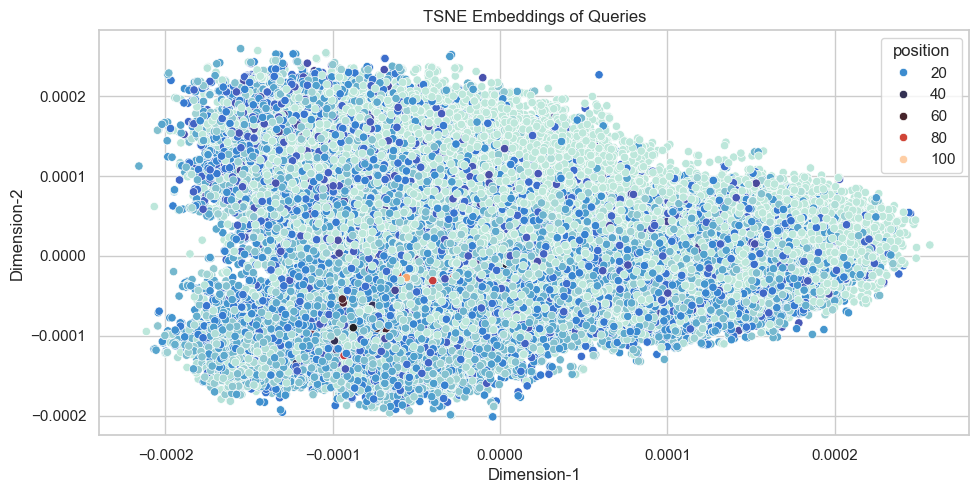

In [18]:
sb.set_theme(style = 'whitegrid')
plt.figure(figsize=(10,5))
sb.scatterplot(x=tsne_train_embed[:,0],y=tsne_train_embed[:,1],hue=df['position'],palette='icefire')
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
plt.title('TSNE Embeddings of Queries')
plt.show()

In [19]:
tsne_train_embed_list = tsne_train_embed.tolist()
df['embedding_queries']  = tsne_train_embed_list

In [21]:
df['embedding_queries']

0           [6.337537797662662e-06, -6.133783608675003e-05]
1          [-0.00013671255146618932, 8.242332842200994e-05]
3          [0.00018263472884427756, -1.991308636206668e-05]
4          [3.3792741305660456e-05, 1.3224858776084147e-05]
5          [6.205516001500655e-06, -2.0040649815200595e-06]
                                ...                        
111282      [0.00014281884068623185, 3.816135722445324e-05]
111283      [5.136273830430582e-05, -6.881581794004887e-05]
111284      [0.00020954792853444815, 4.191918833384989e-06]
111285     [-3.560421419024351e-06, -4.948567220708355e-05]
111286    [-1.8986316717928275e-05, -5.966114713373827e-08]
Name: embedding_queries, Length: 101213, dtype: object

In [50]:
df_top_5 = df.loc[
    (df['position'] == 1) | (df['position'] == 2) | (df['position'] == 3) |
    (df['position'] == 4) | (df['position'] == 5)]

df_top_5.head(5)

,scandate,keywordid,keywordname,url,domain,page,panel,position,title,type,subgroup_position,is_ad,city,browser,embedding_queries
1,2022-04-21 00:09:21,234,office desk,https://www.wayfair.co.uk/Brayden-Studio--Gree...,wayfair,1,MAIN,1.0,"Greenview Desk Brayden Studio Size: 29.02"" H x...",pla,17,1,New York,PC,"[-0.00013671255146618932, 8.242332842200994e-05]"
7,2022-04-21 00:09:21,339,floating shelf,https://www.wayfair.com/Wade-Logan%C2%AE--Hiss...,wayfair,1,MAIN,1.0,Hissop Floating Wall Shelf Wade Logan Size: 1....,pla,18,1,New York,PC,"[-0.00011260167229920626, 7.470871059922501e-05]"
11,2022-04-21 00:09:21,310,small couch,https://www.wayfair.com/George-Oliver--Christn...,wayfair,1,MAIN,1.0,"Christner 58"" Velvet Square Arm Loveseat Georg...",pla,20,1,San Francisco,PC,"[6.271342863328755e-05, 0.0001343708427157253]"
15,2022-04-21 00:09:21,1383,vera bradley backpack,https://www.verabradley.com/products/harry-pot...,verabradley,1,MAIN,1.0,Vera Bradley Harry Potter Sling Backpack Women...,pla,2,1,New York,PC,"[9.451054938836023e-05, 2.8676848160102963e-05]"
17,2022-04-21 00:09:21,1821,axel arigato,https://www.ssense.com/en-us/men/product/axel-...,ssense,1,MAIN,1.0,Axel Arigato SSENSE Exclusive White & Green Ge...,pla,5,1,San Francisco,PC,"[7.74415020714514e-05, -4.870862539974041e-05]"


In [51]:
df_top_5.shape

(39896, 15)

In [70]:
# Calculating similarities score of the search embeddings.

def similarity_score(column,embeddings,dataframe) -> list:
    """Returns similarity score of the queries with the top 3 searches.
    Input : Vector embeddings of search queries as input.
    Output : List of similarities score."""


    # Seperating top-3 search position with rest of the position.
    top_3_data = dataframe[dataframe[column].isin([1,2,3])]
    embed_top_3 = top_3_data[embeddings]
    print('The subset for top 3 is generated')

    # Creating a subset of dataframe where search position is very poor.
    other_data = dataframe[dataframe[column].isin(range(50,102))]
    embed_other_data = other_data[embeddings]
    print('The subset for poor queries is generated')

    final_score = []
    print('Calculation begins')
    for i in embed_top_3:
        for j in embed_other_data:
            score = []
            print(i,j)
            cosine_similarity = np.dot(i,j)// (norm(i)*norm(j))
            score.append(cosine_similarity)
        
        final_score.append(max(score))

    print('Calculation ends')
    return final_score        

In [60]:
cosine_score = similarity_score('position','embedding_queries',df)

The subset for top 3 is generated
The subset for poor queries is generated
Calculation begins
Calculation ends


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99, random_state= 22)
reduced_data = pca.fit_transform(embeddings_sent)

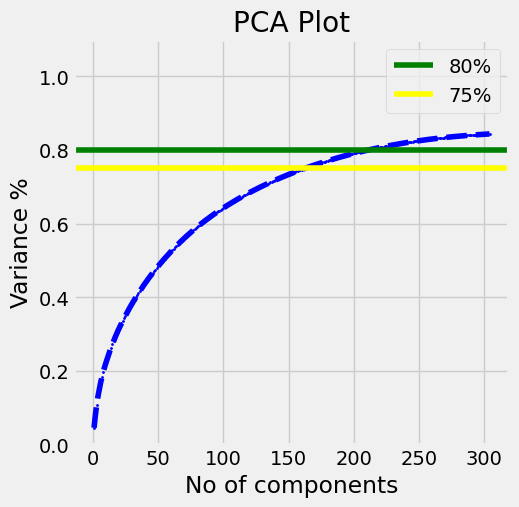

In [19]:
# plotting pca components
plt.rcParams['figure.figsize'] = (5,5)

fig,ax = plt.subplots()
xi = np.arange(1,305,step=1)
y = np.cumsum(pca.explained_variance_)

plt.ylim(0,1.1)
plt.plot(xi,y,marker='o', linestyle = '--', color = 'b',markersize = 1)
plt.xlabel('No of components')
plt.ylabel('Variance %')
plt.title('PCA Plot')
#plt.axhline(y = 0.90, color = 'r', linestyle='-')
#plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=3)
plt.axhline(y = 0.80, color = 'g', linestyle = '-',label = '80%')
#plt.text(0.5, 0.85, '80% cut-off threshold', color = 'blue', fontsize=3)
plt.axhline(y = 0.75 , color ='yellow', linestyle = '-',label = '75%')
plt.legend()
#plt.text(0.5, 0.85, '75% cut-off threshold', color = 'yellow', fontsize=3)
plt.show()

In [20]:
selected_components  = reduced_data[:,:200]
df['search_embeddings'] = selected_components.tolist()
print(df.columns)

Index(['scandate', 'keywordid', 'keywordname', 'url', 'domain', 'page',
       'panel', 'position', 'title', 'type', 'subgroup_position', 'is_ad',
       'city', 'browser', 'search_embeddings'],
      dtype='object')


In [21]:
df.head()

,scandate,keywordid,keywordname,url,domain,page,panel,position,title,type,subgroup_position,is_ad,city,browser,search_embeddings
0,2022-04-21 00:09:21,1068,0.000395,https://www.sellersbuickgmc.com/VehicleSearchR...,0.000010,1,MAIN,10.0,New GMC Sierra 1500 Vehicles for Sale with Tra...,organic,10,0,San Francisco,PC,"[0.015664225444197655, -0.12984073162078857, -..."
1,2022-04-21 00:09:21,234,0.000534,https://www.wayfair.co.uk/Brayden-Studio--Gree...,0.048976,1,MAIN,1.0,"Greenview Desk Brayden Studio Size: 29.02"" H x...",pla,17,1,New York,PC,"[-0.29969966411590576, 0.1747763752937317, -0...."
3,2022-04-21 00:09:21,1614,0.000494,https://www.nyandcompany.com/womens-jeans/boyf...,0.000425,1,MAIN,20.0,Boyfriend Jeans & Mom Jeans for Women | NY&C -...,organic,16,0,New York,PC,"[0.39491841197013855, -0.02775794267654419, 0...."
4,2022-04-21 00:09:21,1869,0.000366,https://purple.fr/magazine/purple-25yrs-anniv-...,0.000079,1,MAIN,22.0,Haider Ackermann - purple MAGAZINE,organic,19,0,San Francisco,PC,"[0.07628946006298065, 0.02867339923977852, -0...."
5,2022-04-21 00:09:21,503,0.000543,https://www.target.com/c/planters-lawn-garden-...,0.014366,1,MAIN,17.0,Planters - Target,organic,11,0,San Francisco,PC,"[0.022667180746793747, -0.010724743828177452, ..."


# Finalizing train data.
* After implementing data preprocessing and feature selection techniques we have selected features for training.

In [22]:
# Extracting features from the final data generated.
search_embeddings_df = pd.DataFrame(df['search_embeddings'].tolist(), columns=[f'embedding_{i}' for i in range(len(df['search_embeddings'].iloc[0]))])
processed_df = pd.concat([df.drop(columns=['search_embeddings']), search_embeddings_df], axis=1)

features = processed_df.drop(['position','keywordid','scandate','url','panel','title','city','browser'],axis=1)
target = round(np.log(df['position']))

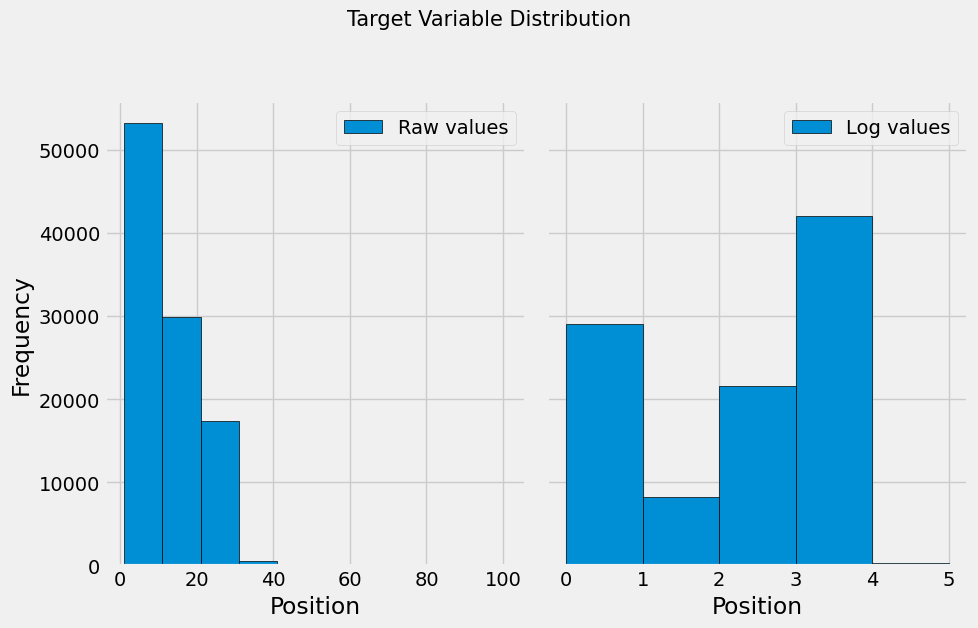

In [23]:
# creating distribution chart
fig,ax = plt.subplots(1,2,figsize = (10,6), sharey=True)
ax[0].hist(df['position'],bins = 10,label = 'Raw values',edgecolor = 'black')
ax[1].hist(target, bins = 5, label = 'Log values' ,edgecolor = 'black')

# Setting chart properties.
ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Frequency')

# add legend
ax[0].legend()
ax[1].legend()

# setting title
fig.suptitle('Target Variable Distribution',fontsize = 15, y =1.05)
plt.tight_layout()
plt.show()

In [24]:
features['type'].replace({'organic':0,'pla':1,'high_paid':2,'low_paid':3,'map':4},inplace=True)
features['type']

C:\Users\maven\AppData\Local\Temp\ipykernel_19116\2573791684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['type'].replace({'organic':0,'pla':1,'high_paid':2,'low_paid':3,'map':4},inplace=True)
C:\Users\maven\AppData\Local\Temp\ipykernel_19116\2573791684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_d

0         0.0
1         1.0
3         0.0
4         0.0
5         0.0
         ... 
101141    NaN
101142    NaN
101144    NaN
101149    NaN
101201    NaN
Name: type, Length: 110371, dtype: float64

# Model Training.
* The data is finally ready to train. 
* We have already created a test set, for training and fine tuning purpose we will create validation set.

In [29]:
class clfSwitcher(BaseEstimator):
    
    """
    A Custom BaseEstimator that can switch between classifiers.
    :param estimator: sklearn object - The classifier
    """ 
    def __init__(self,estimator = RandomForestClassifier):
        self.estimator = estimator

    def fit(self,x,y=None,**kwargs):
        self.estimator.fit(x,y)
        return self
    
    def predict(self,x):
        return self.estimator.predict(x)
    
    def predict_proba(self,x):
        return self.estimator.predict_proba(x)
    
    def score(self,x,y):
        return self.estimator.score(x,y) 

In [25]:
pipeline = Pipeline(steps = [
    ('scaled',StandardScaler()),
    ('clf',clfSwitcher()),
])

parameters = [
    {
        'clf__estimator':[DecisionTreeClassifier(random_state=30)],
        'clf__estimator__max_depth': [5,9,13],
        'clf__estimator__min_samples_split': [2,3,4],
        'clf__estimator__min_samples_leaf': [2,3,4],
    },
    {
        'clf__estimator':[RandomForestClassifier(random_state=30)],
        'clf__estimator__max_depth': [5,9,13],
        'clf__estimator__min_samples_split': [2,3,4],
        'clf__estimator__min_samples_leaf': [2,3,4],
        'clf__estimator__n_estimators':[150,200],
    }
    ]



In [26]:
# splitting data into train and validation set.
split_size = int(0.7*features.shape[0])
train_features = features[:split_size]
train_target = target[:split_size]
val_features = features[split_size:]
val_target = target[split_size:]

In [ ]:
rscv = RandomizedSearchCV(pipeline,parameters,cv=3,verbose=3, scoring = 'f1_macro')
rscv.fit(train_features,train_target)

In [29]:
rscv.best_params_

{'clf__estimator__min_samples_split': 2,
 'clf__estimator__min_samples_leaf': 2,
 'clf__estimator__max_depth': 5,
 'clf__estimator': DecisionTreeClassifier(random_state=30)}

In [27]:
## final model. 
dtclf = DecisionTreeClassifier(random_state=30,min_samples_split=2,min_samples_leaf=2,max_depth=5)
dtclf.fit(train_features,train_target)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=30)

In [28]:
# evaluation function.
def evalaution(y_true,y_pred):
    """Returns evaluation of metrics for the model"""
    print('The accuracy score is',accuracy_score(y_true,y_pred))
    print('The precision score is',precision_score(y_true,y_pred,average='weighted',zero_division=1))
    print('The recall score is',recall_score(y_true,y_pred,average = 'weighted',zero_division=1))
    print('The f1 score is',f1_score(y_true,y_pred,average='weighted',zero_division=1))
    return


y_pred = dtclf.predict(train_features)

print('Evaluation metrics for train set are')
evalaution(train_target,y_pred)

Evaluation metrics for train set are
The accuracy score is 0.9122432337980041
The precision score is 0.9128273966591647
The recall score is 0.9122432337980041
The f1 score is 0.9105016330596941


In [29]:
rdclf = RandomForestClassifier(random_state=30,n_estimators = 50, max_depth = 11, min_samples_leaf = 3, min_samples_split=3)
rdclf.fit(train_features,train_target)

RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=50, random_state=30)

In [29]:
y_pred_rdclf = rdclf.predict(train_features)
print('Evaluation metrics for train set for random forest')
evalaution(train_target,y_pred_rdclf)

Evaluation metrics for train set for random forest
The accuracy score is 0.8499462845752599
The precision score is 0.8698460686356028
The recall score is 0.8499462845752599
The f1 score is 0.8175297194446359


In [37]:
set(train_target) - set(y_pred_rdclf)

{4.0, 5.0}

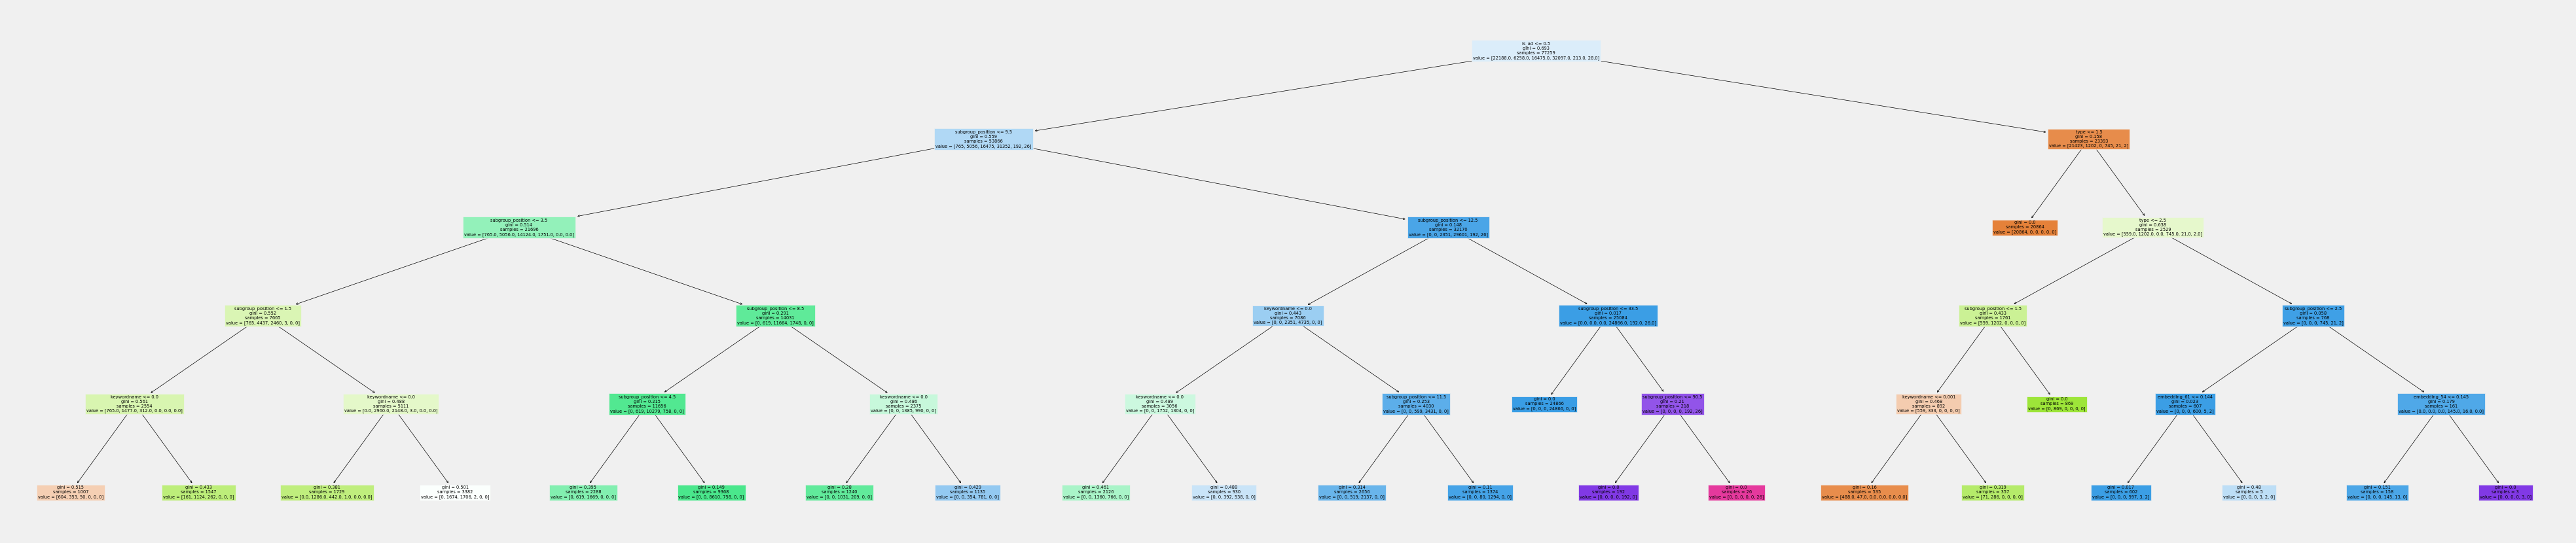

In [53]:
from sklearn import tree

# dtclf.set_params(max_depth=2)
fig = plt.figure(figsize=(45,10))
_ = tree.plot_tree(dtclf,
                   feature_names = train_features.columns,filled = True)

<Axes: >

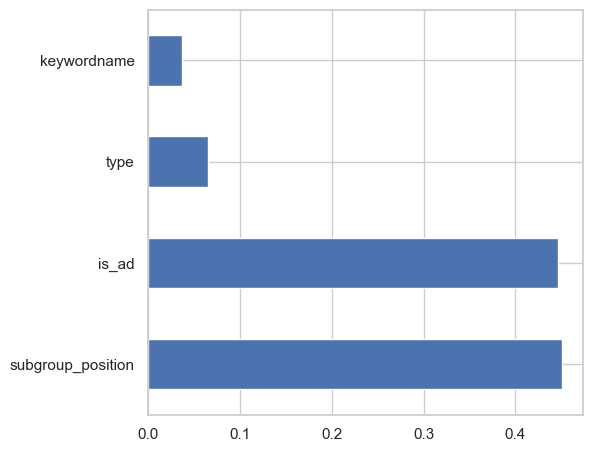

In [31]:
# plottting important features.
feature_importance = pd.Series(dtclf.feature_importances_, index = train_features.columns)
feature_importance_rdclf = pd.Series(rdclf.feature_importances_, index = train_features.columns

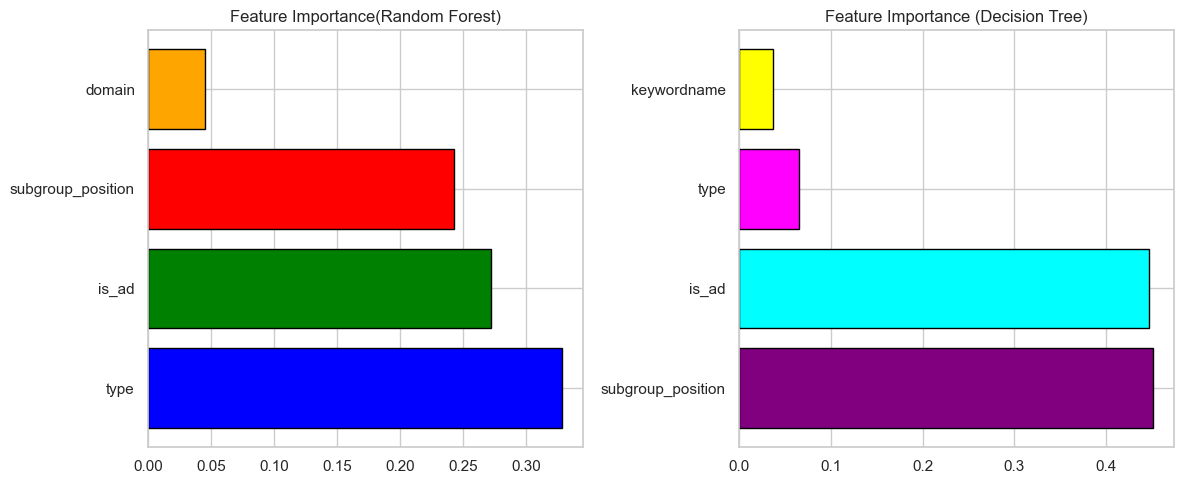

In [40]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].barh(feature_importance_rdclf.nlargest(4).index,feature_importance_rdclf.nlargest(4),color=['blue', 'green', 'red', 'orange'],edgecolor = 'black')
ax[0].set_title('Feature Importance(Random Forest)')

ax[1].barh(feature_importance.nlargest(4).index,feature_importance.nlargest(4),color=['purple', 'cyan', 'magenta', 'yellow'],edgecolor = 'black')
ax[1].set_title('Feature Importance (Decision Tree)')

plt.tight_layout()
plt.show()

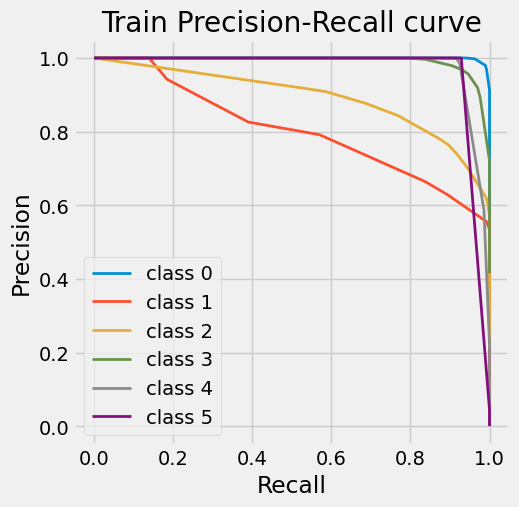

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_score = dtclf.predict_proba(train_features)
precision = dict()
recall = dict()

for i in range(6):
    binary_labels = label_binarize(train_target, classes=[i])
    precision[i], recall[i],_ = precision_recall_curve(binary_labels.ravel(), y_score[:,i])
    plt.plot(recall[i],precision[i],lw = 2, label = 'class {}'.format(i))

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.legend()
plt.show()

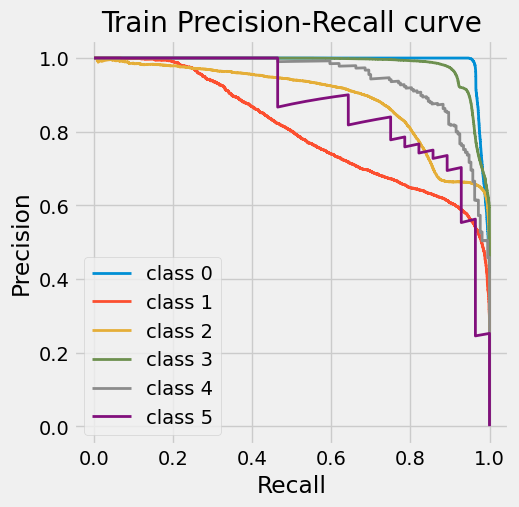

In [55]:
y_score_rf = rdclf.predict_proba(train_features)
precision_rf = dict()
recall_rf = dict()

for i in range(6):
    binary_labels = label_binarize(train_target, classes=[i])
    precision[i], recall[i],_ = precision_recall_curve(binary_labels.ravel(), y_score_rf[:,i])
    plt.plot(recall[i],precision[i],lw = 2, label = 'class {}'.format(i))

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")
plt.legend()
plt.show()